In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter

In [2]:
# SDOF Transient Response (ISO 18431-4)
# th_in : acceleration time history at base
# th_out : acceleration time history at mass
def SDOF_ISO(th_in,dt,fn,zeta):

    wn = 2*np.pi*fn;
    wd = wn*np.sqrt(1-zeta**2);
    A=wn*dt*zeta;
    B=wd*dt;
    
    a, b = np.zeros(3), np.zeros(3);

    b[0] = 1 - np.exp(-A)*np.sin(B)/B;
    b[1] = 2*np.exp(-A)*(np.sin(B)/B - np.cos(B));
    b[2] = np.exp(-2*A) - np.exp(-A) * np.sin(B)/B;

    a[0] = 1;
    a[1] = -2*np.exp(-A)*np.cos(B);
    a[2] = np.exp(-2*A);

    th_out=lfilter(b, a, th_in, axis=-1, zi=None);
    
    return th_out;

In [3]:
## SRS (ISO 18431-4)
def srs_iso(ft,th,dr,dt):
    nf = len(ft);
    rs = np.zeros(nf);
    for i in range(nf):
        rs[i]= max(abs(SDOF_ISO(th,dt,ft[i],dr)));
    return ft,rs;

In [4]:
# RG 1.60
ft = np.array([0.10,  2.50, 9.00, 33.0, 100.0]);  # frequency table
rt = np.array([0.07,  3.13, 2.61,  1.0,   1.0]);  # response spectrum table

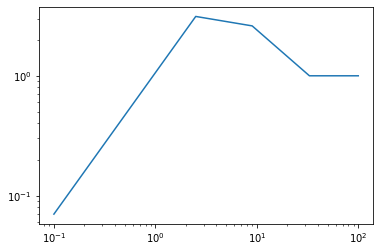

In [5]:
plt.loglog(ft,rt);

In [6]:
tmax = 5; fmax=100;
dt = 1/(2*fmax); t = np.arange(0,tmax+dt,dt)

In [7]:
## frequency table 작성
Nt = len(t); df = fmax/(Nt//2);
freq = np.arange(df, fmax+df, df);

In [8]:
## log-log interpolation
rs = 10**np.interp(np.log10(freq),np.log10(ft),np.log10(rt));

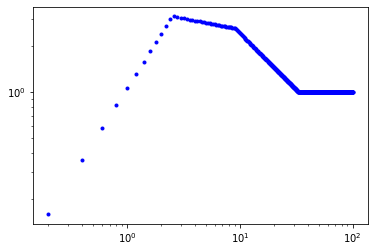

In [9]:
plt.loglog(freq,rs,'b.');

In [12]:
th = np.random.random(len(t));
An = np.zeros(len(rs));
freq,rs_syn = srs_iso(freq,th,0.05,dt);

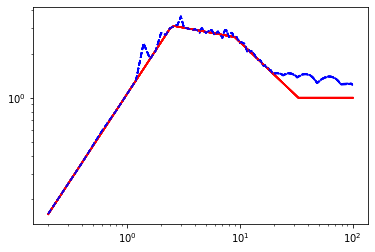

In [22]:
for k in range(10):
    for i in range(len(freq)):
        An[i] = rs[i]/rs_syn[i];
    ft_th = np.fft.fft(th);
    ft_th[:Nt//2] *= An
    ft_th[-(Nt//2):] *= np.flip(An);
    th = np.fft.ifft(ft_th)
    freq,rs_syn = srs_iso(freq,th,0.05,dt);
    plt.loglog(freq,rs,'r-');
    plt.loglog(freq,rs_syn,'b--');